## Economic Analysis with Pandas

<img src = 'https://static.grainews.ca/wp-content/uploads/2023/02/31165129/GettyImages-1443437659_cmyk.jpg'>


Data Source: <a href = 'https://fred.stlouisfed.org/series/UNRATE'> Unemployment Rate </a>

In this study, I obtained the datasets I used through fredapi. I examined the unemployment and participation rates in the United States. (Rob Mulla tutorial)

## Imports

In [1]:
!pip install fredapi > /dev/null

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

from kaggle_secrets import UserSecretsClient
secrets = UserSecretsClient()
fred_key = secrets.get_secret('fred-api')

# Creating the Fred Object

In [3]:
fred = Fred(api_key = fred_key)

# Search for economic data

In [4]:
sp_search = fred.search('S&P', order_by='popularity')

In [5]:
sp_search.shape

(1000, 15)

In [6]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-08-12,2023-08-12,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-08-10,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-08-11 09:10:02-05:00,94,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-08-12,2023-08-12,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-05-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-07-25 08:11:01-05:00,90,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-08-12,2023-08-12,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-08-10,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-08-11 09:10:07-05:00,83,This data represents the effective yield of th...
SP500,SP500,2023-08-12,2023-08-12,S&P 500,2013-08-12,2023-08-11,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-08-11 19:10:58-05:00,82,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2023-08-12,2023-08-12,Real Median Household Income in the United States,1984-01-01,2021-01-01,Annual,A,2021 CPI-U-RS Adjusted Dollars,2021 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2022-09-13 13:48:01-05:00,80,Household data are collected as of March. As ...


# Pull Raw Data & Plot

<Axes: title={'center': 'S&P 500'}>

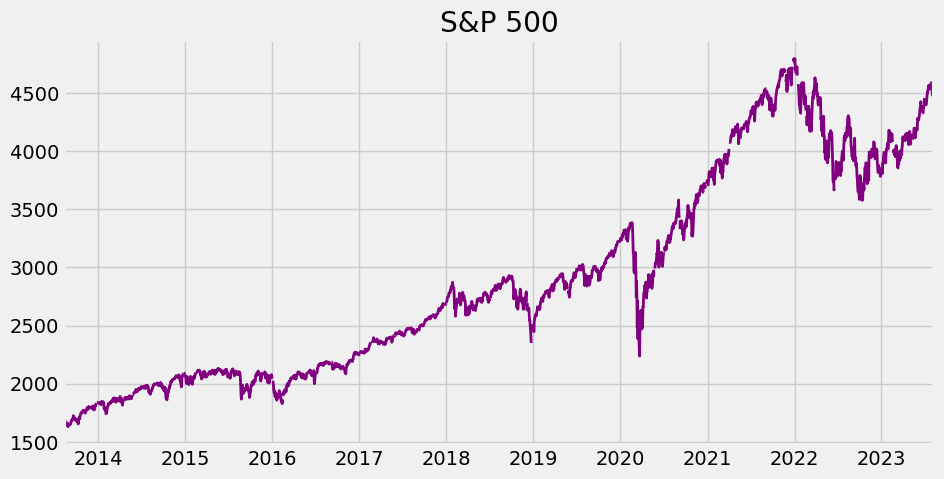

In [7]:
sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(10,5),title='S&P 500', lw=2, color = 'purple')

# Pull and Join Multiple Data Series

In [8]:
unemp_df = fred.search('unemployment rate state', filter = ('frequency', 'Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate in')]

In [9]:
unemp_df.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CAUR,CAUR,2023-08-12,2023-08-12,Unemployment Rate in California,1976-01-01,2023-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-07-26 14:43:01-05:00,58,None
FLUR,FLUR,2023-08-12,2023-08-12,Unemployment Rate in Florida,1976-01-01,2023-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-07-26 14:42:02-05:00,49,None
TXUR,TXUR,2023-08-12,2023-08-12,Unemployment Rate in Texas,1976-01-01,2023-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-07-26 14:42:02-05:00,49,None
NYUR,NYUR,2023-08-12,2023-08-12,Unemployment Rate in New York,1976-01-01,2023-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-07-26 14:42:03-05:00,46,None
OHUR,OHUR,2023-08-12,2023-08-12,Unemployment Rate in Ohio,1976-01-01,2023-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-07-26 14:42:03-05:00,38,None


In [10]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)

In [11]:
uemp_results = pd.concat(all_results, axis=1).drop(['LASMT261982000000003', 'LASMT391746000000003','USAURAMS','PRUR'], axis=1)

id_to_state = unemp_df['title'].str.replace('Unemployment Rate in','').to_dict()
uemp_results.columns = [id_to_state[c] for c in uemp_results.columns]

<Axes: >

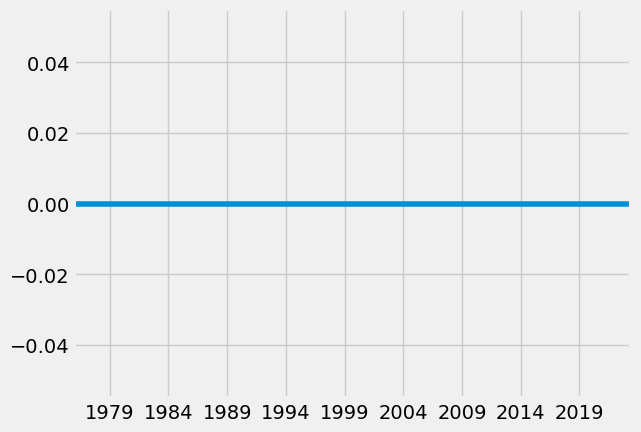

In [12]:
uemp_results.isna().sum(axis=1).plot()

In [13]:
uemp_results.head()

,California,Florida,Texas,New York,Ohio,Alabama,Massachusetts,Illinois,Pennsylvania,Michigan,Colorado,New Jersey,Wisconsin,North Carolina,Georgia,South Carolina,Missouri,Tennessee,Oregon,Arizona,Minnesota,Kentucky,Washington,West Virginia,Indiana,Virginia,Arkansas,Maryland,Utah,Iowa,Oklahoma,Alaska,Nevada,Louisiana,New Mexico,Connecticut,Montana,North Dakota,Delaware,Mississippi,the District of Columbia,Nebraska,Kansas,Idaho,South Dakota,Rhode Island,Hawaii,Wyoming,Maine,New Hampshire,Vermont,Midwest Census Region,Northeast Census Region,South Census Region,New England Census Division,West Census Region
1976-01-01,9.2,9.7,5.8,10.3,8.1,6.6,10.5,6.6,8.0,9.9,5.8,10.3,5.8,6.4,8.4,7.4,5.9,6.0,9.5,10.2,6.0,5.6,8.5,7.5,6.6,6.1,7.3,6.4,5.8,4.3,5.8,7.1,9.2,6.3,8.6,9.8,5.8,3.4,8.0,6.7,8.7,3.3,4.2,5.6,3.3,7.8,9.8,4.1,8.7,6.5,8.6,6.8,9.6,6.9,9.6,8.6
1976-02-01,9.2,9.7,5.8,10.3,8.1,6.6,10.5,6.6,8.1,9.9,5.7,10.3,5.8,6.4,8.4,7.4,5.9,6.0,9.5,10.2,6.0,5.6,8.5,7.5,6.6,6.1,7.3,6.4,5.9,4.3,5.8,7.1,9.2,6.3,8.7,9.8,5.8,3.4,8.0,6.7,8.7,3.3,4.2,5.6,3.3,7.8,9.8,4.1,8.7,6.5,8.6,6.8,9.6,6.9,9.6,8.6
1976-03-01,9.1,9.6,5.9,10.2,8.1,6.6,10.5,6.6,8.1,9.9,5.7,10.3,5.7,6.4,8.4,7.3,5.9,6.0,9.4,10.1,5.9,5.6,8.4,7.5,6.5,6.1,7.3,6.4,5.8,4.3,5.8,7.0,9.2,6.3,8.7,9.8,5.8,3.4,8.0,6.6,8.6,3.3,4.2,5.6,3.2,7.7,9.8,4.1,8.6,6.5,8.6,6.8,9.6,6.9,9.6,8.6
1976-04-01,9.1,9.5,5.9,10.2,8.0,6.5,10.3,6.6,8.1,9.8,5.6,10.3,5.6,6.3,8.3,7.2,6.0,6.0,9.2,10.0,5.8,5.6,8.5,7.5,6.3,6.0,7.2,6.4,5.8,4.2,5.8,6.9,9.0,6.4,8.6,9.6,5.8,3.5,8.1,6.4,8.5,3.2,4.2,5.6,3.1,7.7,9.7,4.0,8.6,6.5,8.6,6.7,9.5,6.8,9.4,8.5
1976-05-01,9.0,9.3,5.9,10.1,7.8,6.4,10.1,6.6,8.1,9.6,5.6,10.3,5.5,6.1,8.1,7.0,6.0,5.9,9.1,9.8,5.7,5.5,8.5,7.4,6.0,5.9,7.1,6.5,5.7,4.1,5.7,6.9,8.9,6.5,8.6,9.4,5.8,3.6,8.3,6.3,8.4,3.1,4.2,5.6,3.1,7.7,9.4,3.9,8.5,6.5,8.5,6.6,9.5,6.7,9.3,8.5


In [14]:
px.line(uemp_results)

## April 2020 Unemployment Rate
It is clearly seen that unemployment rates are peaking in the states due to the pandemic. So let's take a closer look at April 2020.

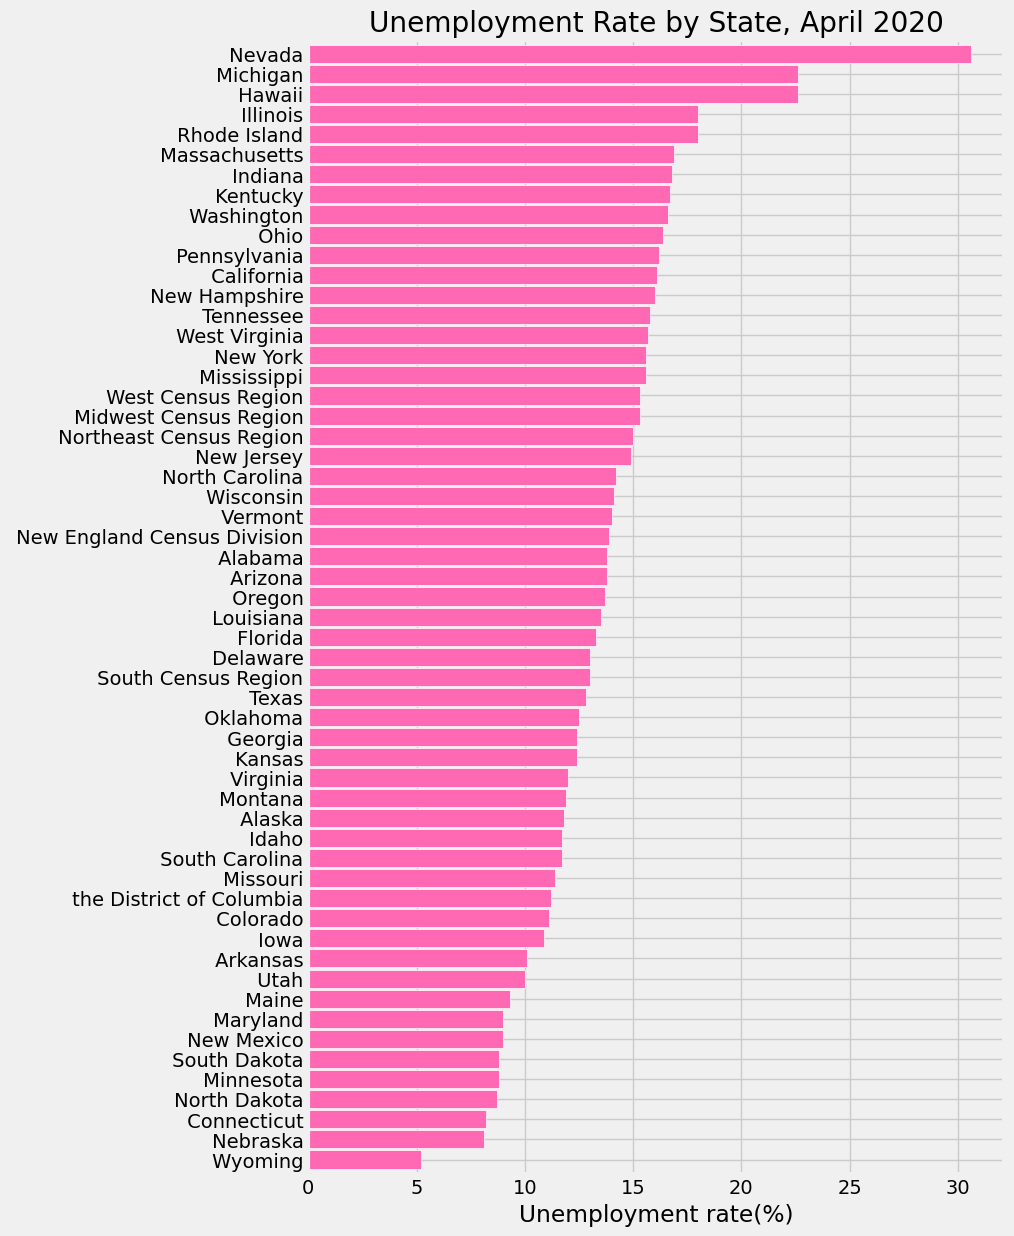

In [15]:
ax = uemp_results.loc[uemp_results.index == '2020-04-01'].T \
    .sort_values('2020-04-01') \
    .plot(kind='barh', figsize=(8,14), width=0.9, edgecolor='white',
          title='Unemployment Rate by State, April 2020',
          color='hotpink')

ax.set_xlabel('Unemployment rate(%)')
ax.legend().remove()
plt.show()

## Participation Rate

In [16]:
part_df = fred.search('participation rate states', filter = ('frequency', 'Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
part_df = part_df.loc[part_df['title'].str.contains('Labor Force Participation Rate for')]

In [17]:
part_df.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
LBSSA01,LBSSA01,2023-08-12,2023-08-12,Labor Force Participation Rate for Alabama,1976-01-01,2023-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-07-21 09:01:07-05:00,12,A state's labor-force participation rate is th...
LBSSA21,LBSSA21,2023-08-12,2023-08-12,Labor Force Participation Rate for Kentucky,1976-01-01,2023-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-07-21 09:01:02-05:00,27,A state's labor-force participation rate is th...
LBSSA06,LBSSA06,2023-08-12,2023-08-12,Labor Force Participation Rate for California,1976-01-01,2023-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-07-21 09:01:05-05:00,17,A state's labor-force participation rate is th...
LBSSA55,LBSSA55,2023-08-12,2023-08-12,Labor Force Participation Rate for Wisconsin,1976-01-01,2023-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-07-21 09:01:02-05:00,25,A state's labor-force participation rate is th...
LBSSA12,LBSSA12,2023-08-12,2023-08-12,Labor Force Participation Rate for Florida,1976-01-01,2023-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-07-21 09:01:01-05:00,25,A state's labor-force participation rate is th...


In [18]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for','').to_dict()

all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)

part_results = pd.concat(all_results, axis=1)
part_results.columns = [part_id_to_state[c] for c in part_results.columns]

## Plot Unemployment vs Participation

In [19]:
uemp_results = uemp_results.rename(columns={' the District of Columbia':' District of Columbia'})

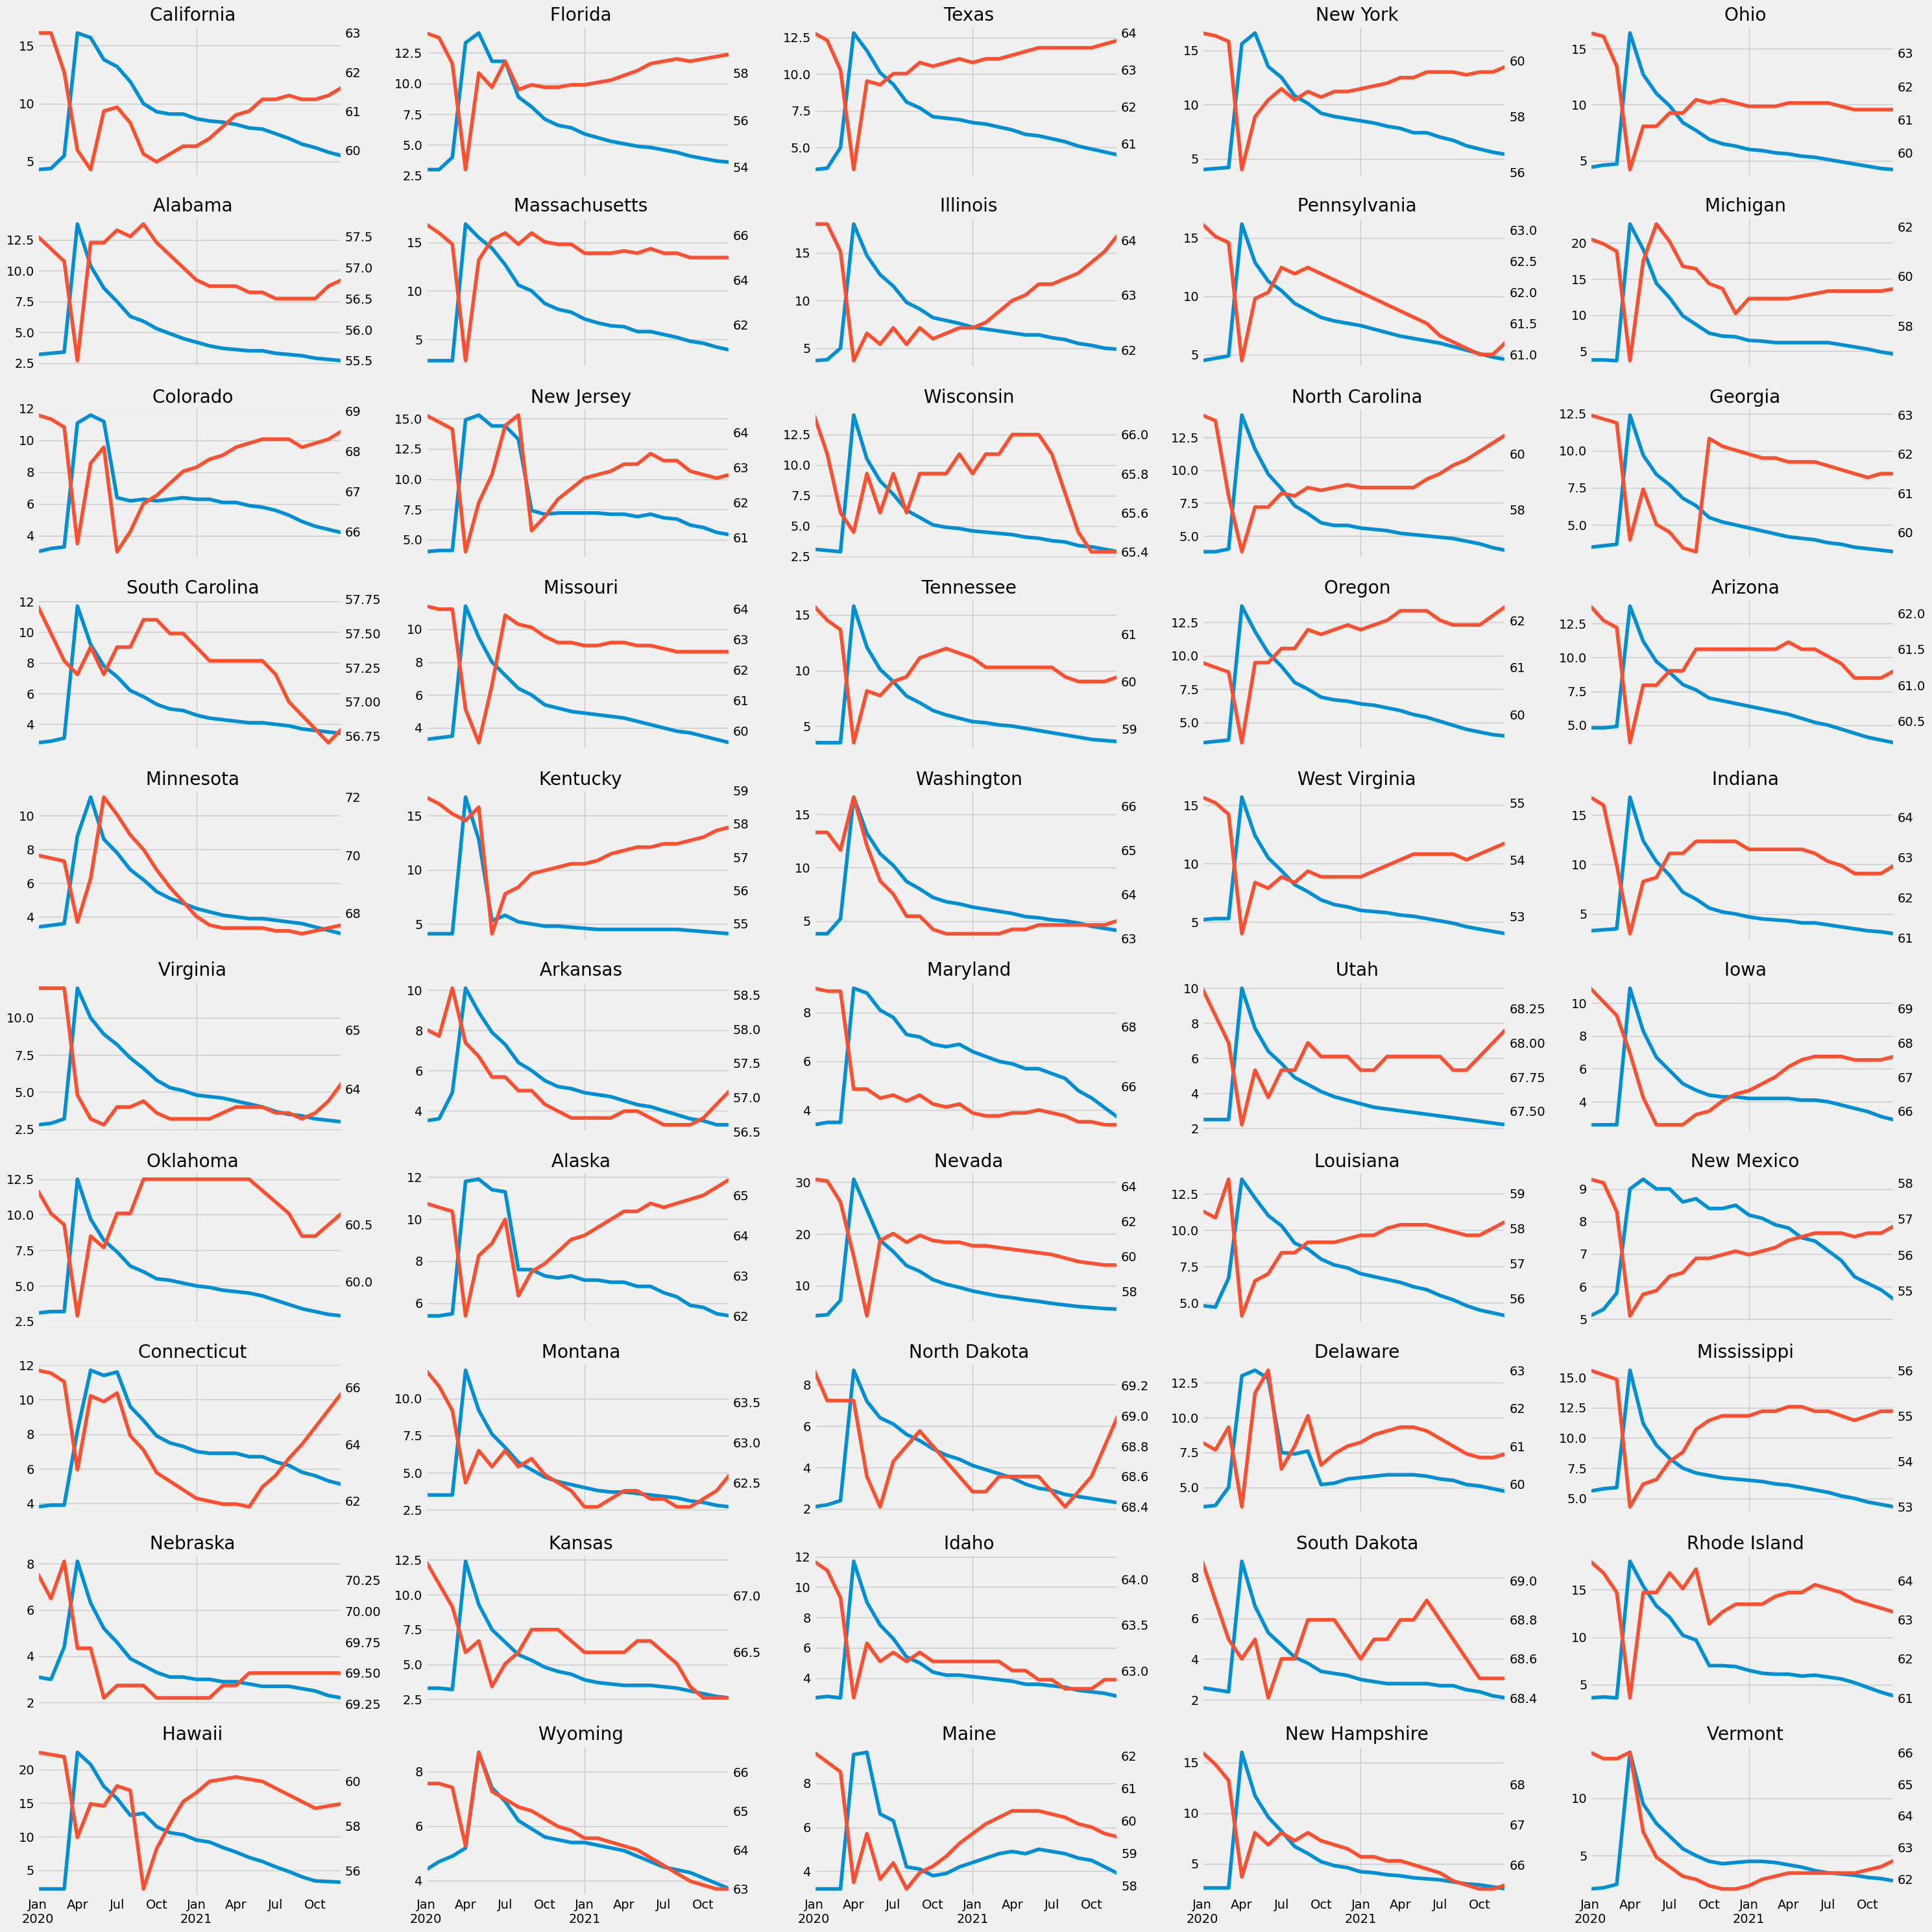

In [20]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in uemp_results.columns:
    if state in [" District of Columbia"," Puerto Rico"]:
        continue
    if i >= len(axs):
        break
    ax2 = axs[i].twinx()
    uemp_results.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment')
    part_results.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()